# Gunjan Chakraborty

## 22MSRDS007

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.simplefilter(action='ignore')

### Loading the Dataset

In [2]:
# %pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

### Exploratory Data Analysis (EDA):

In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
dtypes: float64(11)
memory usage: 558.5 KB


In [4]:
X.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quality  6497 non-null   int64
dtypes: int64(1)
memory usage: 50.9 KB


In [6]:
X.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [7]:
X.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [8]:
# Assuming X and y have a common index
df = pd.merge(X, y, left_index=True, right_index=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


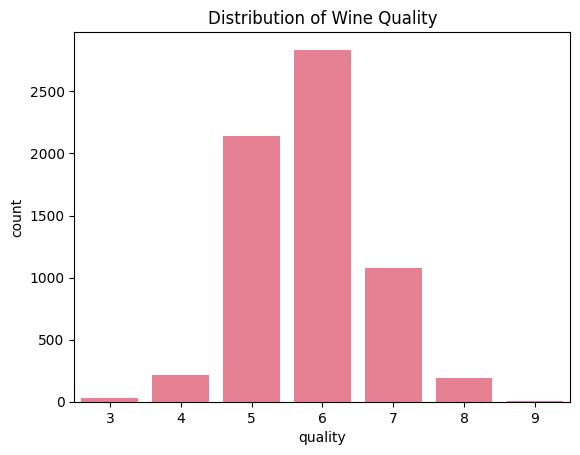

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a colorful palette
sns.set_palette("husl")

# Plot the count plot
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()


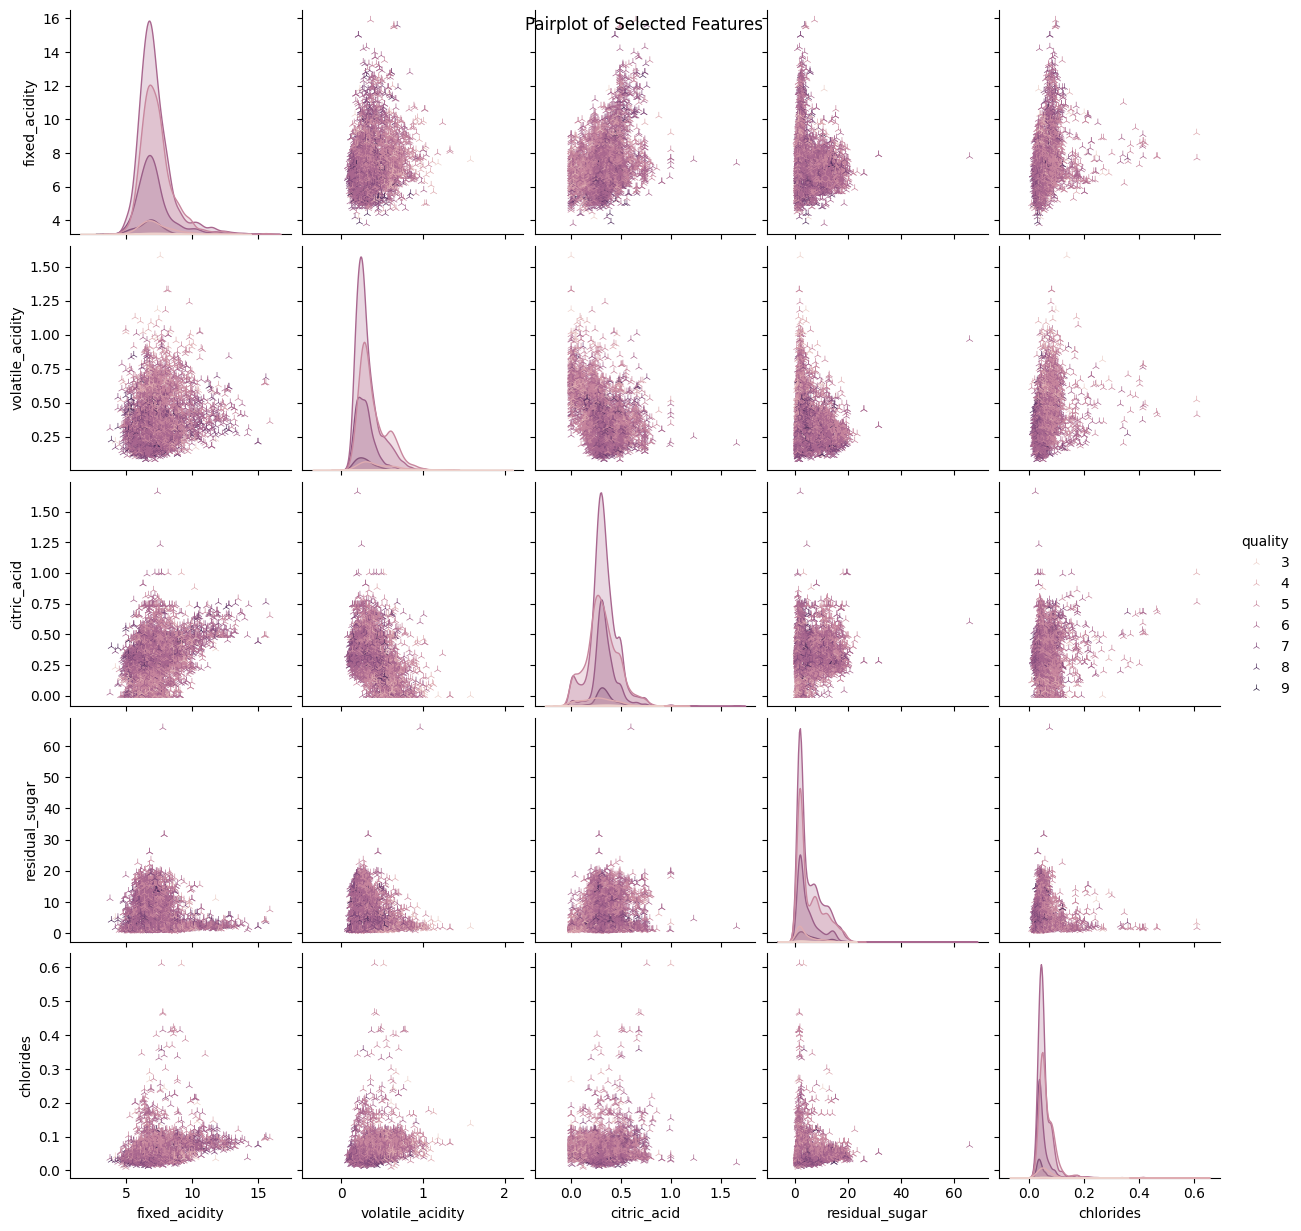

In [11]:
# Pairplot for a subset of features
features_subset = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'quality']
sns.pairplot(df[features_subset], hue='quality', markers='2')
plt.suptitle('Pairplot of Selected Features')
plt.show()

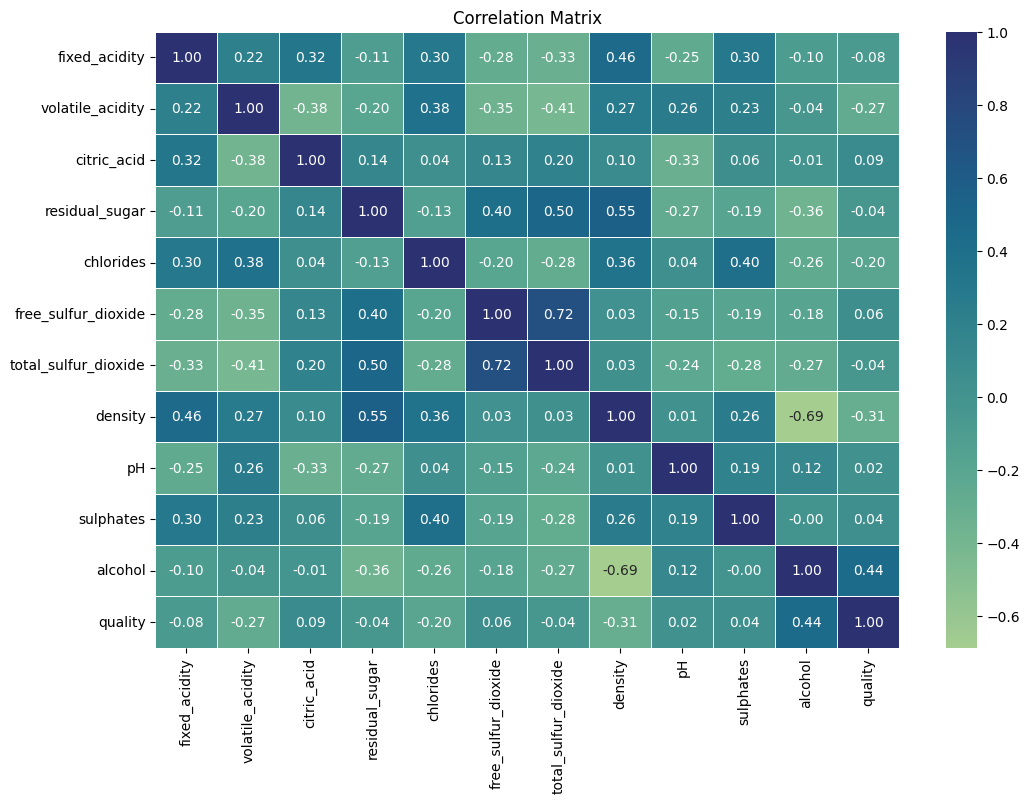

In [12]:
# Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

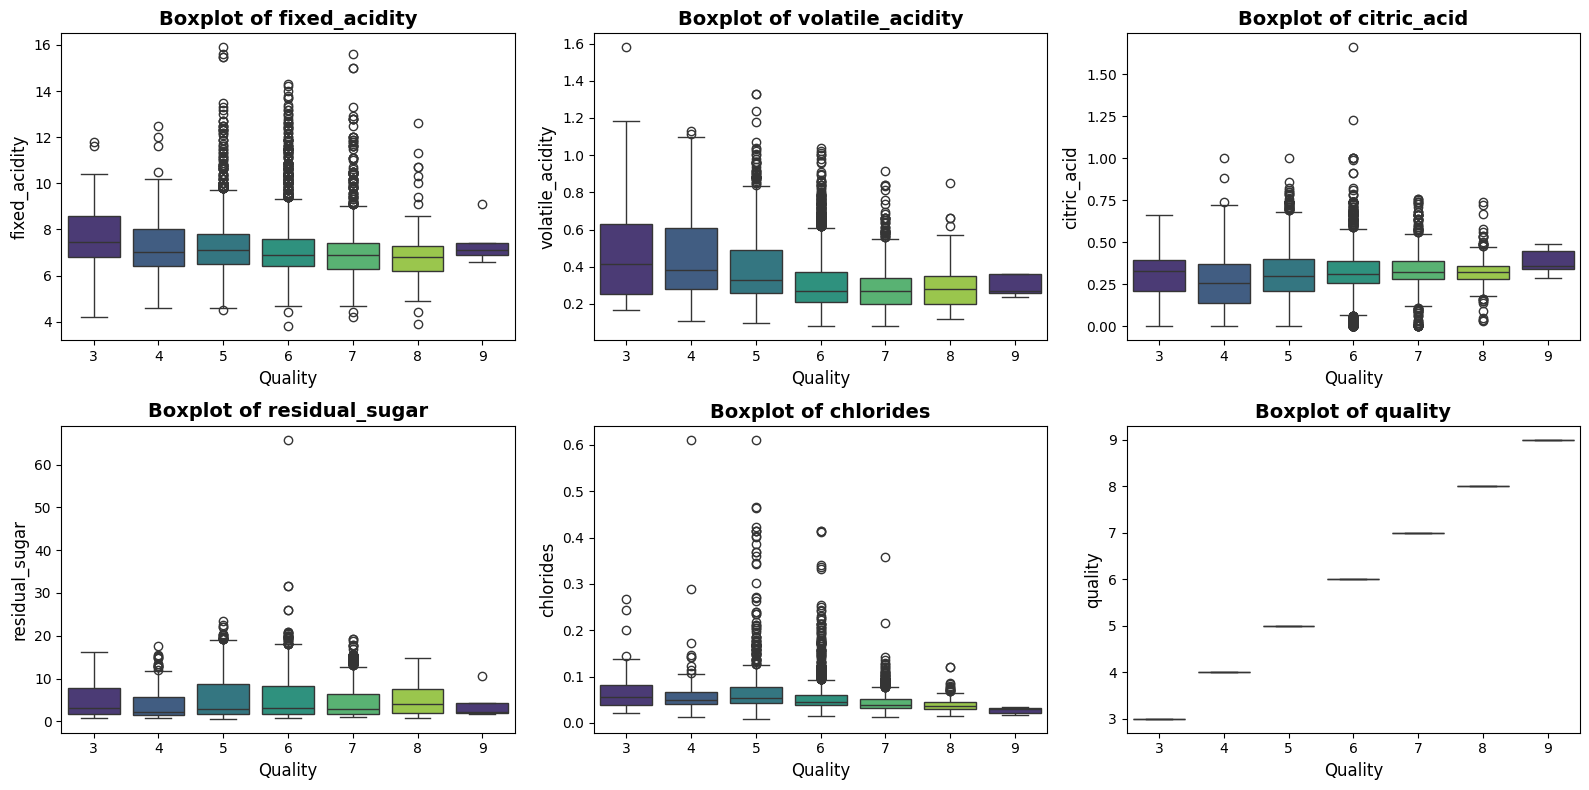

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
colors = sns.color_palette("viridis")

# Plot boxplots for individual features
plt.figure(figsize=(16, 8))
for i, feature in enumerate(features_subset):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='quality', y=feature, data=df, palette=colors)
    plt.title(f'Boxplot of {feature}', fontsize=14, fontweight='bold')
    plt.xlabel('Quality', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


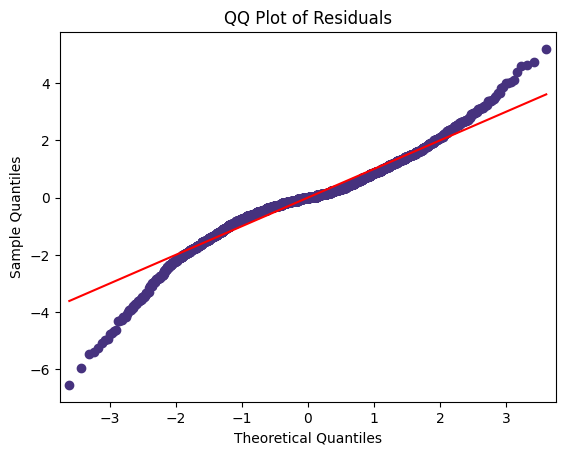

In [14]:
# Q-Q plot
import statsmodels.api as sm
from scipy.stats import probplot

target_column_name = 'quality'
# Set a colorful palette
sns.set_palette("viridis")
# Fit the model
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Get the residuals
residuals = y - model.predict(X)

# Create a QQ plot
sm.qqplot(residuals, line='s', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

In [15]:
import numpy as np

# Calculate Z-scores for each column
z_scores = np.abs((df - df.mean()) / df.std())

# Define a threshold for outliers (e.g., Z-score greater than 3)
outlier_threshold = 3

# Identify outliers for each column
outliers = (z_scores > outlier_threshold).sum()

# Display the count of outliers for each column
print("Number of outliers for each column:")
print(outliers)

Number of outliers for each column:
fixed_acidity           128
volatile_acidity         95
citric_acid              28
residual_sugar           26
chlorides               107
free_sulfur_dioxide      36
total_sulfur_dioxide      8
density                   3
pH                       33
sulphates                75
alcohol                   2
quality                  35
dtype: int64


In [16]:
# Assuming df is your dataframe
columns_with_outliers = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

# Remove rows with outliers using the IQR method
for column in columns_with_outliers:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
# Remove rows with outliers
df= df[~df[columns_with_outliers].apply(lambda x: x.isin(x[(x >= Q1 - 1.5 * IQR) & (x <= Q3 + 1.5 * IQR)])).all(axis=1)]


In [17]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X contains the predictor variables
VIF = df.drop('quality', axis=1)

# Calculate VIF for each predictor variable
vif_data = pd.DataFrame()
vif_data["Variable"] = VIF.columns
vif_data["VIF"] = [variance_inflation_factor(VIF.values, i) for i in range(VIF.shape[1])]

# Display the VIF values
print(vif_data)

                Variable          VIF
0          fixed_acidity    94.718350
1       volatile_acidity    10.991543
2            citric_acid    16.140903
3         residual_sugar     3.980340
4              chlorides    22.150443
5    free_sulfur_dioxide    10.436729
6   total_sulfur_dioxide    18.388988
7                density  1094.597420
8                     pH   675.080859
9              sulphates    24.816717
10               alcohol   139.355772


### Model training

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Separate features and target variable
X = df.drop('quality', axis=1)
y = df['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVM classifier
svm_classifier = SVC()

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test_scaled)

# Calculate accuracy of SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy (SVM):", accuracy_svm)

# Print confusion matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

Accuracy (SVM): 0.5893665158371041


In [19]:

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the KNN classifier
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_knn = knn_classifier.predict(X_test_scaled)

# Calculate accuracy of KNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNN):", accuracy_knn)

# Print confusion matrix for KNN
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)


Accuracy (KNN): 0.6052036199095022
Confusion Matrix (SVM):
[[  0  16  13   0]
 [  0 148 110   1]
 [  0  68 335  24]
 [  0   7 124  38]]
Confusion Matrix (KNN):
[[  2  15  10   2]
 [  2 167  84   6]
 [  2  98 282  45]
 [  0  18  67  84]]


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize SVM classifier
svm_classifier = SVC()

# Initialize GridSearchCV for SVM
svm_grid_search = GridSearchCV(estimator=svm_classifier, param_grid=svm_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters for SVM
svm_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters for SVM
best_params_svm = svm_grid_search.best_params_
print("Best Parameters (SVM):", best_params_svm)

# munna tujse na ho payega


In [ ]:
# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Hyperparameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Initialize GridSearchCV for KNN
knn_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV to find the best parameters for KNN
knn_grid_search.fit(X_train_scaled, y_train)

# Get the best parameters for KNN
best_params_knn = knn_grid_search.best_params_
print("Best Parameters (KNN):", best_params_knn)